# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
from pandas import read_csv, get_dummies
from numpy import number
from seaborn import diverging_palette, clustermap
from graphviz import Source

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

df_housing = read_csv('../housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
# Separando as variáveis indicadoras
X = df_housing.drop(columns=['median_house_value']).copy()

X = get_dummies(X, drop_first=True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  bool   
 9   ocean_proximity_ISLAND      20640 non-null  bool   
 10  ocean_proximity_NEAR BAY    20640 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.3 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [42]:
# Guardando variavel resposta
y = df_housing.loc[:,'median_house_value']

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

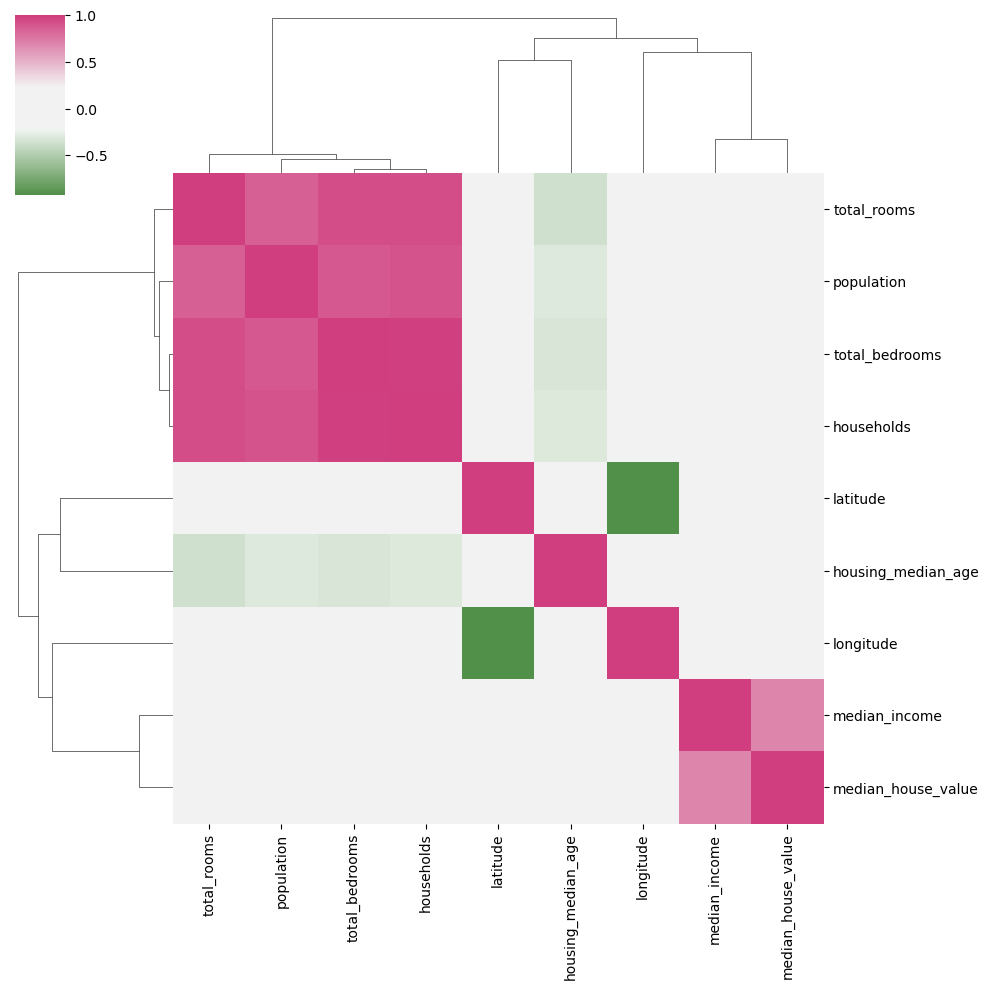

In [43]:
# Calculando a matriz de correlação
correlation_matrix_housing = df_housing.select_dtypes(include=[number]).corr()

# Plotar a clustermap
cmap = diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
clustermap(
    correlation_matrix_housing,
    figsize=(10, 10),
    center=0,
    cmap=cmap,
)

### 3. Separe os dados em validação e teste

In [44]:
# Separa os dados em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [45]:
# Treinando arvore com profundidade 2 e 8
dtr_2 = DecisionTreeRegressor(max_depth=2)
dtr_8 = DecisionTreeRegressor(max_depth=8)

dtr_2.fit(X_train, y_train)
dtr_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [46]:
# Realizando predicao
y_pred_reg_2 = dtr_2.predict(X_train)
y_pred_reg_8 = dtr_8.predict(X_train)

In [51]:
# Calculo R2
r2_reg_2 = dtr_2.score(X_train, y_train)
r2_reg_8 = dtr_8.score(X_train, y_train)

print(f'O R2 para profundidade 2 foi: {r2_reg_2:.2f}.')
print(f'O R2 para profundidade 8 foi: {r2_reg_8:.2f}.')

# OBS: Quanto ao R2, quanto maior melhor

O R2 para profundidade 2 foi: 0.49.
O R2 para profundidade 8 foi: 0.76.


In [50]:
# Calculo MSE
mse_reg_2 = mean_squared_error(y_train, y_pred_reg_2)
mse_reg_8 = mean_squared_error(y_train, y_pred_reg_8)

print(f'O MSE para profundidade 2 foi: {mse_reg_2:.2f}.')
print(f'O MSE para profundidade 8 foi: {mse_reg_8:.2f}.')

# OBS: Quanto ao MSE, quanto menor melhor

O MSE para profundidade 2 foi: 6793591556.61.
O MSE para profundidade 8 foi: 3272116533.99.


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

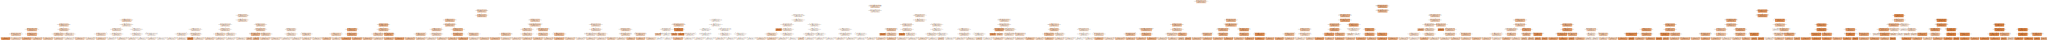

In [52]:
# Visualizando a arvore 2
dot_data = tree.export_graphviz(
    dtr_8,
    out_file=None,
    feature_names=X.columns,
    filled=True
)

# Draw graph
graph = Source(dot_data, format="png") 
graph

```median_income```